# 最小二乗法による回帰分析

アルゴリズムの実装に必要なライブラリをインポートします。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

正弦関数に正規分布の乱数を加えたデータセットを生成します。

In [0]:
num = 30
xs = np.linspace(0, 1, num)
ys = np.sin(2*np.pi*xs) + normal(scale=0.3, size=num)

生成したデータをグラフに表示します。

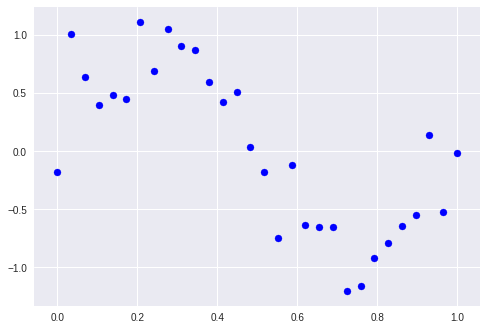

In [3]:
plt.scatter(xs, ys, marker='o', color='blue')

最小二乗法を用いて、データにフィットする多項式を決定する関数を用意します。

In [0]:
def resolve(xs, ys, m):
  n = len(xs)
  t = ys
  phi = np.array([1]*n)
  for i in range(1, m+1):
    phi = np.vstack([phi, xs**i])
  phi = phi.T
  tmp = np.linalg.inv(np.dot(phi.T, phi))
  a = np.dot(np.dot(tmp, phi.T), t)

  def f(x):
    y = 0
    for i, c in enumerate(a):
      y += c * (x ** i)
    return y

  return f

用意した関数を用いて多項式を決定した後、平方根平均二乗誤差を計算します。

In [0]:
f = resolve(xs, ys, 3)
err = np.sqrt(np.sum((ys - f(xs))**2) / len(xs))  

データの生成に用いた正弦関数と、先ほど決定した多項式をグラフに表示します。あわせて、平方根平均二乗誤差の値も表示ます。破線のグラフが正弦関数で、実線のグラフが最小二乗法で決定された多項式を表します。

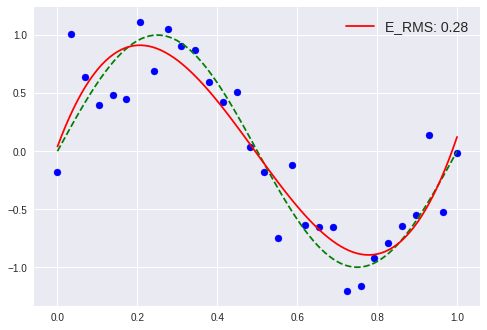

In [6]:
plt.scatter(xs, ys, marker='o', color='blue')
linex = np.linspace(0,1,101)
liney = np.sin(2*np.pi*linex)
plt.plot(linex, liney, color='green', linestyle='--')
liney = f(linex)
label = "E_RMS: {:.2f}".format(err)
plt.plot(linex, liney, color='red', label=label)
plt.legend(loc=1, fontsize=14)